In [2]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

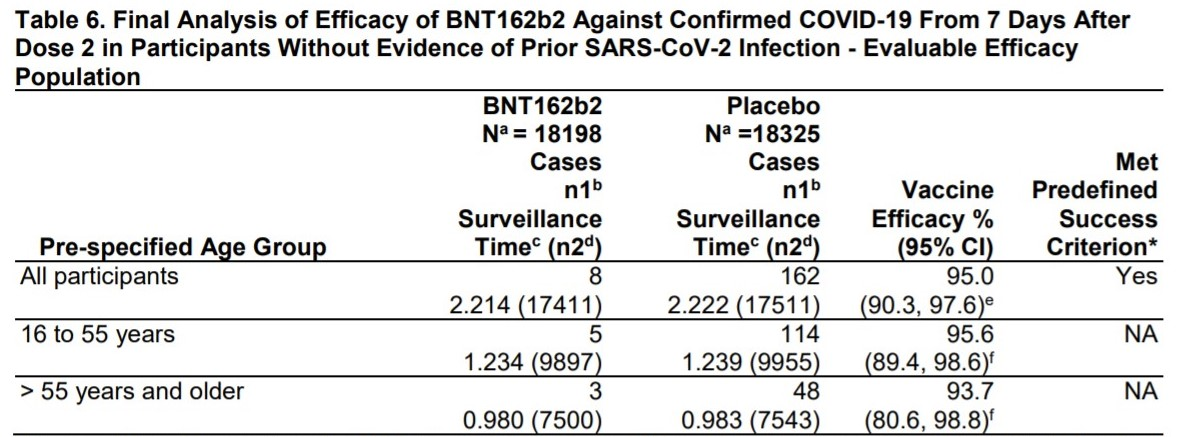

In [0]:
#3


In [10]:
#2
data=([8, 162],[18190, 18163])
df1 = pd.DataFrame(data, columns = ['Drug', 'Placebo'], index=['Infected', 'Not Infected'])
df1

Drug  Placebo
Infected          8      162
Not Infected  18190    18163

In [34]:
#observed chi squared

inf=[8, 162]
notinf= [18190, 18163]
covid=[inf,notinf]
covidarr=np.array(covid)
a=covidarr[0,0]
b=covidarr[0,1]
c=covidarr[1,0]
d=covidarr[1,1]
N=a+b+c+d
DI=((a+b)/N)*(a+c)
PI=((a+b)/N)*(b+d)
DN=((c+d)/N)*(a+c)
PN=((c+d)/N)*(b+d)
ochisquared=(((a-DI)**2)/DI)+(((b-PI)**2)/PI)+(((c-DN)**2)/DN)+(((d-PN)**2)/PN)
ochisquared

139.08600532038324

In [39]:
#simulated chi squared

result=[]
drug=['d infected']*8+['d not infected']*18190
placebo=['p infected']*162+['p not infected']*18163
covidzeros=np.zeros([2,2])
for i in range(10000):
    drand=np.random.choice(drug, 18198)
    dinfected = drand == ['d infected']
    dnot = drand == ['d not infected']
    covidzeros[0,0]=np.sum(dinfected)
    covidzeros[1,0]=np.sum(dnot)
    prand=np.random.choice(placebo, 18163)
    pinfected = prand == ['p infected']
    pnot = prand == ['p not infected']
    covidzeros[0,1]=np.sum(pinfected)
    covidzeros[1,1]=np.sum(pnot)
    a=covidzeros[0,0]
    b=covidzeros[0,1]
    c=covidzeros[1,0]
    d=covidzeros[1,1]
    N=a+b+c+d
    DI=((a+b)/N)*(a+c)
    PI=((a+b)/N)*(b+d)
    DN=((c+d)/N)*(a+c)
    PN=((c+d)/N)*(b+d)
    chisquared=(((a-DI)**2)/DI)+(((b-PI)**2)/PI)+(((c-DN)**2)/DN)+(((d-PN)**2)/PN)
    result.append(chisquared)

<ipython-input-43-45ee63c034bc>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  p=np.sum(count=='True')


0.0

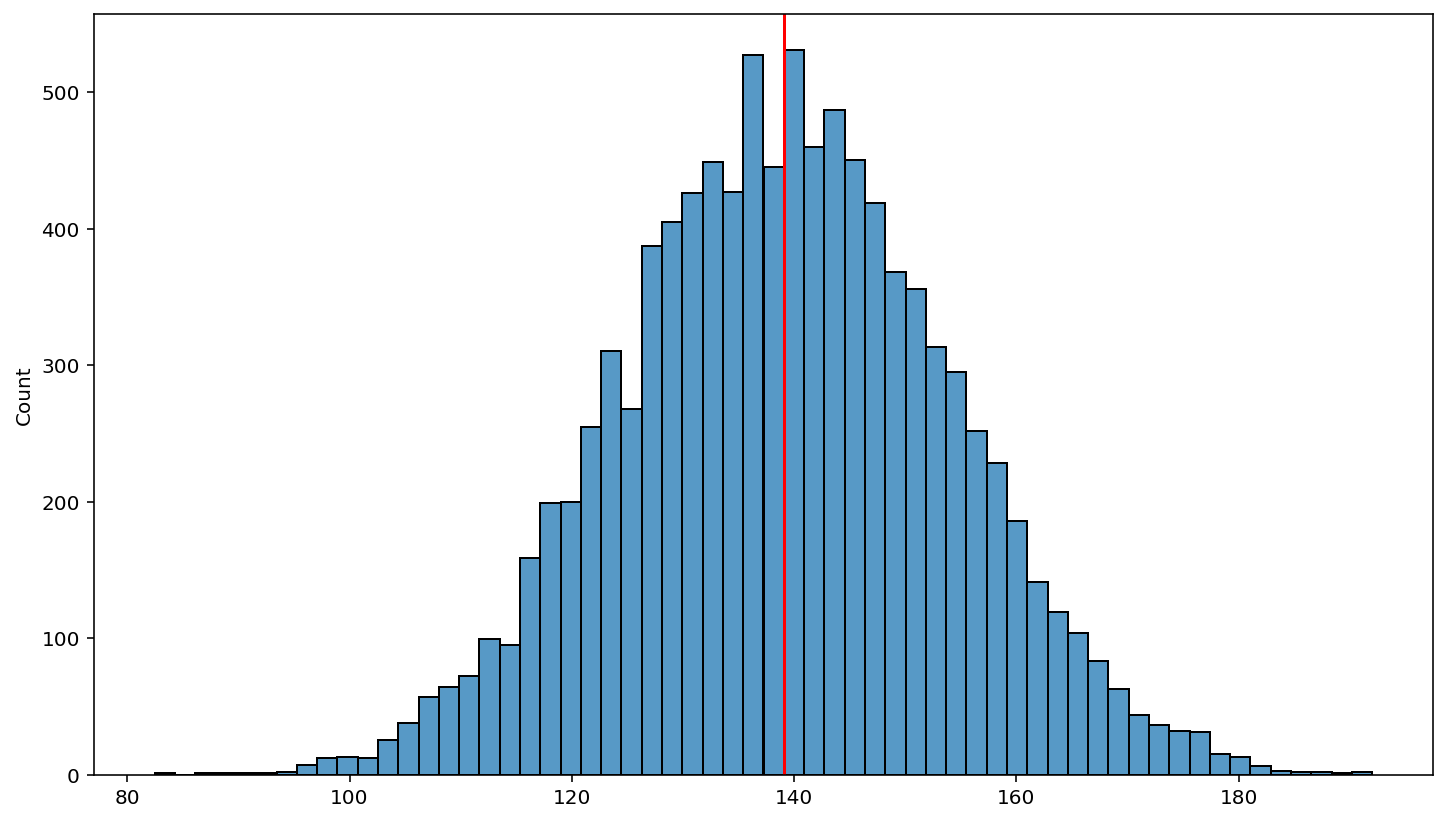

In [43]:
graph=sns.histplot(results)
graph.axvline(ochisquared, color="red")
count=results>=ochisquared
p=np.sum(count=='True')
p/10000